# MPVBench_Tutorial

<img src="data/img/00MPVBench_logo.svg" alt="MPVBenchLogo" width="600"/>

This notebook offers tools and workflows to analyze power and temperature data from the **MPVBench** repository over time. The data, records from various Mini Photovoltaic (MPV) systems located in districts Karlsruhe and Pforzheim, provide real-measured MPV data insights.  For a detailed overview of the data, structure, and MPV systems, refer to the MPVBench repository's [README.md](README.md).

**⚠️ Note**: **Last update was on 01.08.2024**.

#### **Step 1: Check if files exist**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Check versions
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

# Define the paths to the CSV files
power_path = 'data/p_watt.csv'
temp_path = 'data/t_celsius.csv'

# Check if the power data file exists
if not os.path.exists(power_path):
    raise FileNotFoundError(f"File not found: {power_path}")
# Check if the temperature data file exists
if not os.path.exists(temp_path):
    raise FileNotFoundError(f"File not found: {temp_path}")

pandas version: 2.2.2
matplotlib version: 3.9.1


#### **Step 2: Load the CSV files**

In [2]:
# Load the power data CSV into a DataFrame
df_power = pd.read_csv(power_path)
# Load the temperature data CSV into a DataFrame
df_temp = pd.read_csv(temp_path)

#### **Step 3: Ensure 'time' is parsed as datetime**

In [3]:
# Convert the 'time' column in the power DataFrame to datetime objects
df_power['time'] = pd.to_datetime(df_power['time'])
# Convert the 'time' column in the temperature DataFrame to datetime objects
df_temp['time'] = pd.to_datetime(df_temp['time'])

#### **Step 4: Print the first few rows and data types of each DataFrame**

In [4]:
print("Power DataFrame:")
# Display the first five rows of the power DataFrame
print("First 5 rows:")
print(df_power.head())

# Display the last five rows of the power DataFrame
print("\nLast 5 rows:")
print(df_power.tail())

print("\nTemperature DataFrame:")
# Display the first five rows of the temperature DataFrame
print("First 5 rows:")
print(df_temp.head())

# Display the last five rows of the temperature DataFrame
print("\nLast 5 rows:")
print(df_temp.tail())

Power DataFrame:
First 5 rows:
                 time   1a   1b   2a   2b   1c
0 2023-08-04 00:00:00  0.0  0.0  0.0  0.0  0.0
1 2023-08-04 00:15:00  0.0  0.0  0.0  0.0  0.0
2 2023-08-04 00:30:00  0.0  0.0  0.0  0.0  0.0
3 2023-08-04 00:45:00  0.0  0.0  0.0  0.0  0.0
4 2023-08-04 01:00:00  0.0  0.0  0.0  0.0  0.0

Last 5 rows:
                     time   1a      1b   2a   2b   1c
34843 2024-07-31 22:45:00  0.0  0.0000  0.0  0.0  0.0
34844 2024-07-31 23:00:00  0.0  0.0000  0.0  0.0  0.0
34845 2024-07-31 23:15:00  0.0  0.0000  0.0  0.0  0.0
34846 2024-07-31 23:30:00  0.0  0.0000  0.0  0.0  0.0
34847 2024-07-31 23:45:00  0.0  0.0525  0.0  0.0  0.0

Temperature DataFrame:
First 5 rows:
                 time         1a   1b   2a   2b   1c
0 2023-08-04 00:00:00  22.270000  0.0  0.0  0.0  0.0
1 2023-08-04 00:15:00  22.393333  0.0  0.0  0.0  0.0
2 2023-08-04 00:30:00  22.446667  0.0  0.0  0.0  0.0
3 2023-08-04 00:45:00  22.406667  0.0  0.0  0.0  0.0
4 2023-08-04 01:00:00  22.466667  0.0  0.0  0.

#### **Step 5: Calculate mean values for the specified date range**

In [5]:
# Define the date range
start_date = '2024-07-24'
end_date = '2024-07-31'
# Convert the date strings to datetime objects
start_date_dt = pd.to_datetime(start_date, format='%Y-%m-%d')
end_date_dt = pd.to_datetime(end_date, format='%Y-%m-%d')
# Calculate the difference in days
date_difference = (end_date_dt - start_date_dt).days

# Filter the DataFrames for the specified date range
mask_power = (df_power['time'] >= start_date) & (df_power['time'] <= end_date)
mask_temp = (df_temp['time'] >= start_date) & (df_temp['time'] <= end_date)

# Calculate mean values for the filtered power DataFrame
mean_power_range = df_power.loc[mask_power].mean(numeric_only=True)
print(f"\nMean values for Power DataFrame from {start_date} to {end_date}:")
print(mean_power_range)

# Calculate mean values for the filtered temperature DataFrame
mean_temp_range = df_temp.loc[mask_temp].mean(numeric_only=True)
print(f"\nMean values for Temperature DataFrame from {start_date} to {end_date}:")
print(mean_temp_range)


Mean values for Power DataFrame from 2024-07-24 to 2024-07-31:
1a    72.264517
1b    99.708004
2a    98.426600
2b    49.036582
1c    82.175324
dtype: float64

Mean values for Temperature DataFrame from 2024-07-24 to 2024-07-31:
1a    26.236855
1b    25.287593
2a    24.645701
2b    21.647712
1c    22.964299
dtype: float64


#### **Step 6: Plot the data**

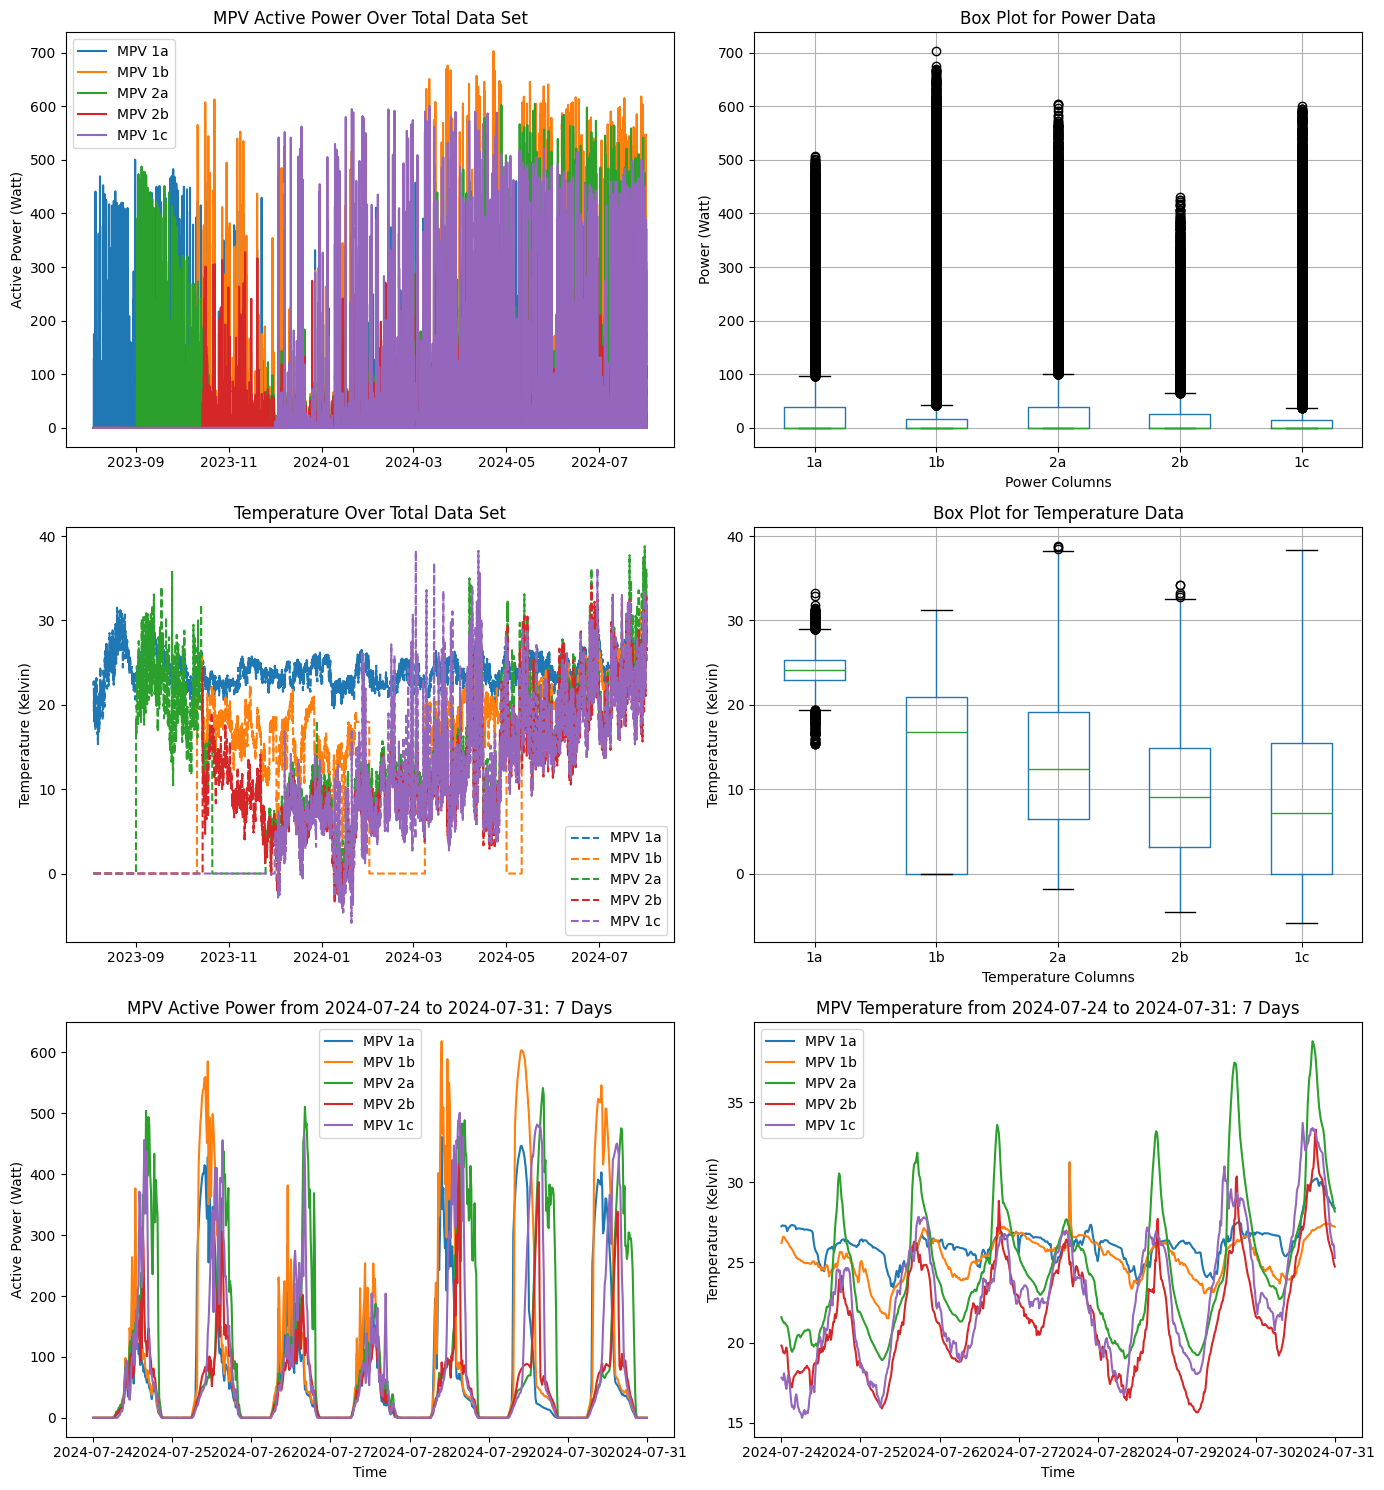

In [6]:
# Create a new figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Plot Active Power
for col in df_power.columns[1:]:
    axs[0, 0].plot(df_power['time'], df_power[col], label=f'MPV {col}')
axs[0, 0].set_ylabel('Active Power (Watt)')
axs[0, 0].set_title('MPV Active Power Over Total Data Set')
axs[0, 0].legend()

# Plot Temperature
for col in df_temp.columns[1:]:
    axs[1, 0].plot(df_temp['time'], df_temp[col], label=f'MPV {col}', linestyle='--')
axs[1, 0].set_ylabel('Temperature (Kelvin)')
axs[1, 0].set_title('Temperature Over Total Data Set')
axs[1, 0].legend()

# Plot Active Power for Specified Date Range
for col in df_power.columns[1:]:
    axs[2, 0].plot(df_power['time'].loc[mask_power], df_power[col].loc[mask_power], label=f'MPV {col}')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('Active Power (Watt)')
axs[2, 0].set_title(f'MPV Active Power from {start_date} to {end_date}: {date_difference} Days')
axs[2, 0].legend()

# Box Plot for Power Data
df_power.iloc[:, 1:].boxplot(ax=axs[0, 1])
axs[0, 1].set_title('Box Plot for Power Data')
axs[0, 1].set_ylabel('Power (Watt)')
axs[0, 1].set_xlabel('Power Columns')

# Box Plot for Temperature Data
df_temp.iloc[:, 1:].boxplot(ax=axs[1, 1])
axs[1, 1].set_title('Box Plot for Temperature Data')
axs[1, 1].set_ylabel('Temperature (Kelvin)')
axs[1, 1].set_xlabel('Temperature Columns')

# Plot Temperature for Specified Date Range
for col in df_temp.columns[1:]:
    axs[2, 1].plot(df_temp['time'].loc[mask_power], df_temp[col].loc[mask_power], label=f'MPV {col}')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('Temperature (Kelvin)')
axs[2, 1].set_title(f'MPV Temperature from {start_date} to {end_date}: {date_difference} Days')
axs[2, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### **Step 7: Conclusion** 

Congratulations! You have learned to load, analyze, and visualize power and temperature data. This knowledge can be applied in various domains, especially energy analysis and climate studies. Feel free to enhance the visualizations or integrate more data sources for a deeper analysis.